In [7]:
%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("GHCN_2017.csv", parse_dates=['DATE'])

In [10]:
df.head()

,Unnamed: 0,ID,DATE,ELEMENT,DATA_VALUE,M-FLAG,Q-FLAG
0,50300,USC00088782,2017-01-01,TMAX,283,NaN,NaN
1,50301,USC00088782,2017-01-01,TMIN,133,NaN,NaN
2,50303,USC00088782,2017-01-01,PRCP,0,NaN,NaN
3,50536,USC00093538,2017-01-01,TMAX,239,NaN,NaN
4,50537,USC00093538,2017-01-01,TMIN,78,NaN,NaN


In [11]:
dfc = df.pivot_table(index=['ID', 'DATE'], columns=['ELEMENT'], values='DATA_VALUE')
dfc.head()

ELEMENT                 PRCP   TMAX   TMIN
ID          DATE                          
USC00088782 2017-01-01   0.0  283.0  133.0
            2017-01-02   0.0  300.0  178.0
            2017-01-03   0.0  283.0  194.0
            2017-01-04   0.0  233.0  133.0
            2017-01-05   0.0  233.0  133.0

In [12]:
ghcn = dfc.reset_index()
ghcn.head()

ELEMENT,ID,DATE,PRCP,TMAX,TMIN
0,USC00088782,2017-01-01,0.0,283.0,133.0
1,USC00088782,2017-01-02,0.0,300.0,178.0
2,USC00088782,2017-01-03,0.0,283.0,194.0
3,USC00088782,2017-01-04,0.0,233.0,133.0
4,USC00088782,2017-01-05,0.0,233.0,133.0


# lets compute the descriptive stats on our dataset

In [13]:
ghcn.describe()

ELEMENT,PRCP,TMAX,TMIN
count,195828.000000,194215.000000,194214.000000
mean,24.933457,185.689056,68.755069
std,86.582641,120.501545,110.812821
min,0.000000,-444.000000,-506.000000
25%,0.000000,106.000000,0.000000
50%,0.000000,206.000000,78.000000
75%,6.000000,282.000000,150.000000
max,6612.000000,544.000000,398.000000


<AxesSubplot:>

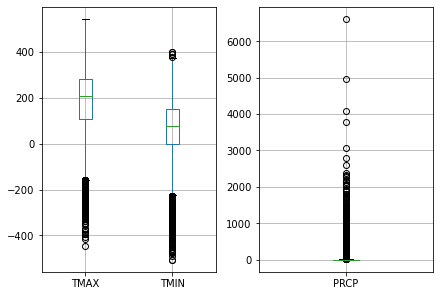

In [14]:
# matplotlib under the hood, for reference 
# https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)
ghcn[['TMAX', 'TMIN']].boxplot(ax=ax1)
ghcn[['PRCP']].boxplot(ax=ax2)

# Plot one variable of one station

<AxesSubplot:>

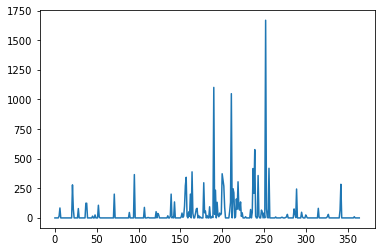

In [15]:
# plot one day
ghcn['PRCP'][ghcn['ID'].str.contains('USC00088782')].plot()

<AxesSubplot:>

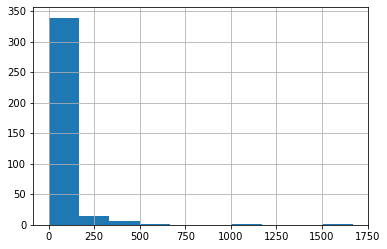

In [16]:
ghcn['PRCP'][ghcn['ID'].str.contains('USC00088782')].hist()

<AxesSubplot:>

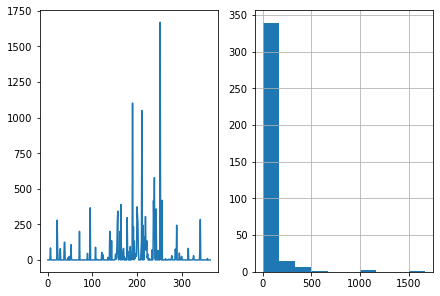

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2,  constrained_layout=True)
ghcn['PRCP'][ghcn['ID'].str.contains('USC00088782')].plot(ax=ax1)
ghcn['PRCP'][ghcn['ID'].str.contains('USC00088782')].hist(ax=ax2)

# Sample 10 stations

In [18]:
ss = np.random.choice(ghcn['ID'].unique(), size=10)

groupby seperates each station into its own timeseries

this grabs all the station ids in SS
we pass in ax so that all the plots are on the same figure

[Text(0, 0.5, 'PRCP')]

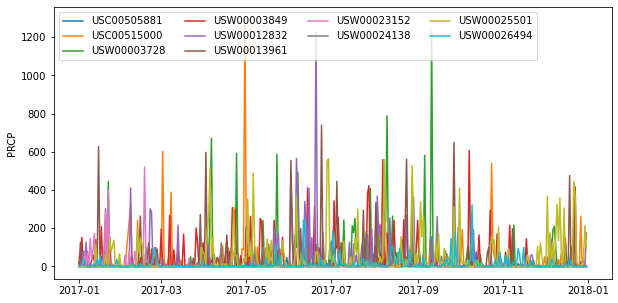

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
for station, gdf in ghcn[ghcn['ID'].isin(ss)].groupby('ID'):
    ax.plot('DATE', 'PRCP', data=gdf, label=station)
ax.legend(ncol=4, loc='upper left')
ax.set(ylabel='PRCP')

## compute average precip for each date

here we groupby date because that's how we want to compute our aggregation (our mean)

<AxesSubplot:xlabel='DATE'>

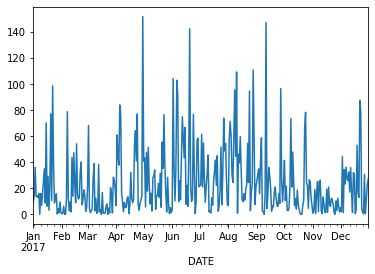

In [20]:
ghcn[ghcn['ID'].isin(ss)].groupby('DATE')['PRCP'].mean().plot()

# NEXT STEP

1. try with 10 different stations
2. try with TMAX and TMIN
3. try plotting the time series of the descripitive statistics for each variable

In [23]:
ghcn.groupby(pd.Grouper(freq='M', key='DATE')).mean()[['TMAX', 'TMIN']]

ELEMENT,TMAX,TMIN
DATE,,
2017-01-31,67.408107,-28.049782
2017-02-28,109.354804,-4.141839
2017-03-31,128.363839,10.696027
2017-04-30,186.969810,65.697193
2017-05-31,222.708042,98.945621
2017-06-30,272.712879,148.559177
2017-07-31,299.037842,174.875817
2017-08-31,279.447754,160.890605
2017-09-30,253.301349,130.996002


In [31]:
table = ghcn.pivot_table(index='ID', columns='DATE', values='PRCP')

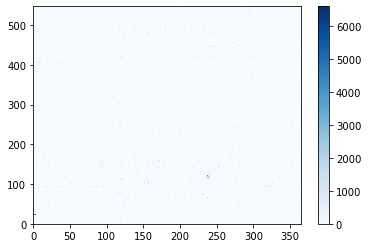

In [41]:
fig, ax = plt.subplots()
im = ax.pcolormesh(table.values, cmap='Blues')
fig.colorbar(im, ax=ax)

In [40]:
table.shape

(547, 365)